In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df_app = pd.read_csv('cleaned_appdata10.csv')
df_app.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


# STEP #5: SPLIT then PREPROCESSING DATA

In [3]:
y = df_app['enrolled']
x = df_app.drop(columns='enrolled')
x.shape, y.shape

((50000, 49), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40000, 49), (10000, 49), (40000,), (10000,))

In [5]:
if 'user' in x_train.columns:
    user_id_train = x_train['user']
    x_train.drop(columns='user', inplace=True)
if 'user' in x_test.columns:
    user_id_test = x_test['user']
    x_test.drop(columns='user', inplace=True)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40000, 48), (10000, 48), (40000,), (10000,))

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train =pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index) # cuz scaler return np array without index and colums
x_test =pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns, index=x_test.index)


In [7]:
x_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.972325,1.404166,-1.175102,-0.963062,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,-1.165789
45891,-1.489818,0.328622,-0.898034,-1.090390,2.883254,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.418852,-0.260877,0.057524,-0.289185,0.309800
42613,-0.012532,-0.881364,-0.620967,1.392493,-0.346830,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,3.976153,-0.763372,-0.289185,-1.165789
43567,0.479896,0.059736,-0.436255,-1.090390,2.883254,-0.457453,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,-1.165789


# STEP #6: MODELS TRAINING && Evaluation
- LogisticRegression
- Random Forest
- XGBoost
- SVM 

Train Accuracy: 0.76755 Test Accuracy: 0.7679


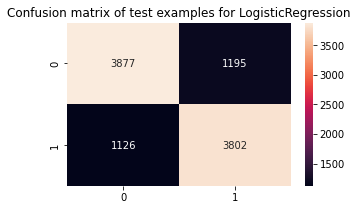

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

y_hat_train = lr.predict(x_train)
y_hat_test = lr.predict(x_test)

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_hat_test, ),annot=True, fmt='g')
plt.title('Confusion matrix of test examples for LogisticRegression')
print(f"Train Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train)} Test Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test)}")


Train Accuracy: 0.87935 Test Accuracy: 0.786


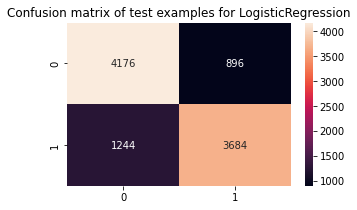

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=100, max_depth=15, max_features=0.45)
rfc.fit(x_train, y_train)

y_hat_train = rfc.predict(x_train)
y_hat_test = rfc.predict(x_test)

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_hat_test, ),annot=True, fmt='g')
plt.title('Confusion matrix of test examples for LogisticRegression')
print(f"Train Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train)} Test Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test)}")


Train Accuracy: 0.9973 Test Accuracy: 0.769


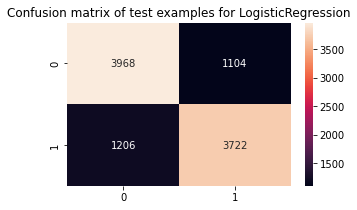

In [10]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, n_estimators=100, max_depth=15)
xgb.fit(x_train, y_train)

y_hat_train = xgb.predict(x_train)
y_hat_test = xgb.predict(x_test)

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_hat_test, ),annot=True, fmt='g')
plt.title('Confusion matrix of test examples for LogisticRegression')
print(f"Train Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train)} Test Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test)}")


In [18]:
final_results = pd.concat([user_id_test, y_test], axis=1)
final_results['predicted'] = y_hat_test
final_results.reset_index(drop=True, inplace=True)
final_results

,user,enrolled,predicted
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,0
...,...,...,...
9995,143036,1,1
9996,91158,1,1
9997,248318,0,0
9998,142418,1,0
